<a href="https://colab.research.google.com/github/Mrsnellek/MSDS_686_22F8W2/blob/23S8W1/MSDS%20686/Week_3/MNIST_Regularization_and_Dropout_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Digits Regularization and Dropout Assignment
## Adapted from Deep Learning with Python by Francois Chollet
#### Use the MNIST digit dataset to classify digits 0 - 9 into 10 different categories.  Use regularization and early stopping to improve your neural network.

In [31]:
# Import all the necessary libraries 
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [32]:
# Import the MNIST data set from the Keras library. https://keras.io/datasets/
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [33]:
# Reshape and normalize the images for your neural net

I'm gonna just add a scale and flatten layer to the model

In [34]:
# Convert the labels into categorical values.

I'd rather not.

In [37]:
# Split the data into training and validation

BATCH_SIZE = 128
test_ds = tf.data.Dataset.from_tensor_slices((test_images, test_labels)).batch(BATCH_SIZE).prefetch(1)
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels)).shuffle(10000, reshuffle_each_iteration=False)
val_ds = train_ds.skip(train_ds.cardinality().numpy() * .8).batch(BATCH_SIZE).prefetch(1)
train_ds = train_ds.take(train_ds.cardinality().numpy() * .8).shuffle(10000).batch(BATCH_SIZE).prefetch(1)
train_ds.cardinality().numpy() * BATCH_SIZE, val_ds.cardinality().numpy() * BATCH_SIZE, test_ds.cardinality().numpy() * BATCH_SIZE

(np.int64(48000), np.int64(12032), np.int64(10112))

## In each Jupyter Notebook cell build a model using your test and validation data, show loss and accuracy monitoring graphs, and evaluate your model on the test data *all in one cell*.  

## Build at least 7 different models. Use markdown above the code cell to explain what you are changing/testing in the subsequent model. 

## Build models with different learning rates, batch sizes, dropout, regularization, and hidden layers and nodes.  Be strategic in how you go about optimizing your model. The last model of your notebook should be your best model. 


I'm not going to evaluate each model on the test data, because that would mean overfitting the hyperparameters to the test data which will make the accuracy not generalize to new data. That's what the validation set is for, so that each model doesn't have be measured using the test set.

Epoch 1/10


2025-01-27 14:02:13.765098: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_102', 8 bytes spill stores, 8 bytes spill loads

2025-01-27 14:02:14.141468: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_102', 300 bytes spill stores, 300 bytes spill loads

2025-01-27 14:02:14.376378: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_102', 20 bytes spill stores, 20 bytes spill loads

2025-01-27 14:02:14.404223: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_102', 32 bytes spill stores, 32 bytes spill loads

2025-01-27 14:02:14.613026: I external/local_xla/xla/stream_exec

347/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8036 - loss: 0.7071

2025-01-27 14:02:18.307730: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 8 bytes spill stores, 8 bytes spill loads

2025-01-27 14:02:18.440742: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 300 bytes spill stores, 300 bytes spill loads

2025-01-27 14:02:18.554481: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 32 bytes spill stores, 32 bytes spill loads

2025-01-27 14:02:18.643982: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_34', 8 bytes spill stores, 8 bytes spill loads

2025-01-27 14:02:18.786120: I external/local_xla/xla/stream_executor/c

375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.8102 - loss: 0.6836 - val_accuracy: 0.9418 - val_loss: 0.2087
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9461 - loss: 0.1930 - val_accuracy: 0.9577 - val_loss: 0.1500
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9603 - loss: 0.1370 - val_accuracy: 0.9638 - val_loss: 0.1226
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9693 - loss: 0.1057 - val_accuracy: 0.9672 - val_loss: 0.1123
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9757 - loss: 0.0851 - val_accuracy: 0.9696 - val_loss: 0.0992
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9796 - loss: 0.0713 - val_accuracy: 0.9724 - val_loss: 0.0887
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9832 - loss: 0.0580 - val_accuracy: 0.9732 - val_loss: 0.0889
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9866 - loss: 0.0494 - val_accuracy: 0.9747 - val_

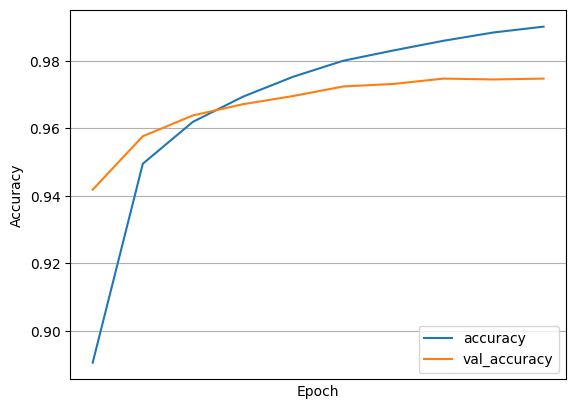

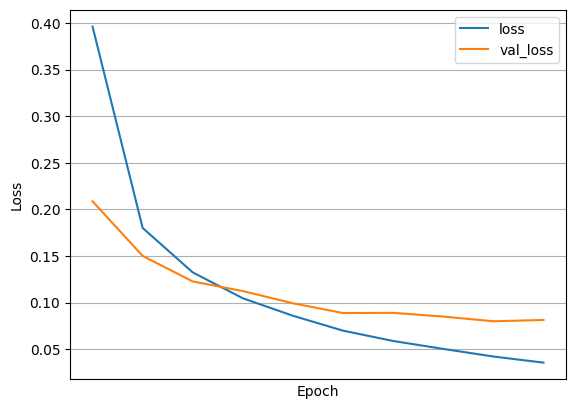

Best validation accuracy: 0.9747499823570251 at epoch 8


In [38]:
model1 = keras.Sequential()
model1.add(keras.layers.Input(shape=(28, 28)))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Rescaling(1./255))
model1.add(keras.layers.Dense(128, activation='relu'))
model1.add(keras.layers.Dense(10, activation='softmax'))

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model1.fit(train_ds, validation_data=val_ds, epochs=10)

# plot the training and validation accuracy on one graph and training and validation loss on another graph
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([])
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([])
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Print the best validation accuracy and its corresponding epoch
print('Best validation accuracy:', max(hist.history['val_accuracy']), 'at epoch', np.argmax(hist.history['val_accuracy']) + 1)

The model looks underfit so I'll add another layer and train longer.

Epoch 1/20


2025-01-27 14:02:48.411363: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_143', 24 bytes spill stores, 24 bytes spill loads



327/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8075 - loss: 0.6809

2025-01-27 14:02:51.397448: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_43', 80 bytes spill stores, 96 bytes spill loads



375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8190 - loss: 0.6399 - val_accuracy: 0.9509 - val_loss: 0.1684
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9527 - loss: 0.1567 - val_accuracy: 0.9643 - val_loss: 0.1174
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9687 - loss: 0.1020 - val_accuracy: 0.9699 - val_loss: 0.1044
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9782 - loss: 0.0745 - val_accuracy: 0.9725 - val_loss: 0.0919
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9830 - loss: 0.0562 - val_accuracy: 0.9733 - val_loss: 0.0886
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9873 - loss: 0.0442 - val_accuracy: 0.9738 - val_loss: 0.0855
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9910 - loss: 0.0317 - val_accuracy: 0.9744 - val_loss: 0.0843
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9913 - loss: 0.0290 - val_accuracy: 0.9758 - val_

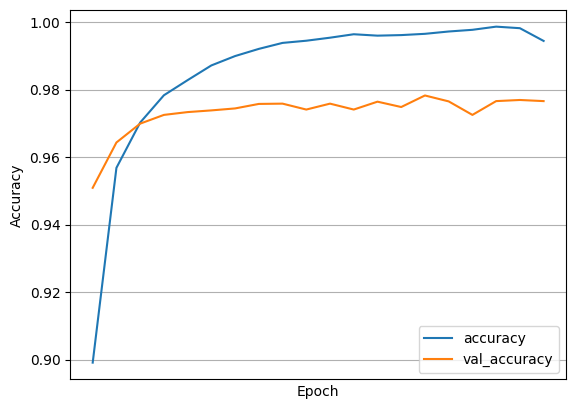

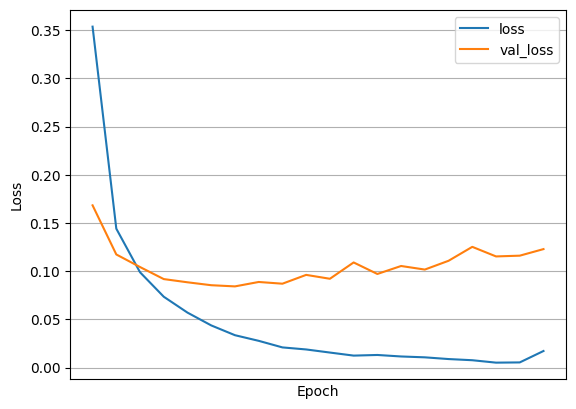

Best validation accuracy: 0.9782500267028809 at epoch 15


In [39]:
tf.keras.backend.clear_session()

model2 = keras.Sequential()
model2.add(keras.layers.Input(shape=(28, 28)))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Rescaling(1./255))

# Add more layers to the model
model2.add(keras.layers.Dense(128, activation='relu'))
model2.add(keras.layers.Dense(128, activation='relu'))
model2.add(keras.layers.Dense(10, activation='softmax'))

model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train for 20 epochs
hist = model2.fit(train_ds, validation_data=val_ds, epochs=20)

# Plot the training and validation accuracy on one graph and training and validation loss on another graph
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([])
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([])
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Print the best validation accuracy
print('Best validation accuracy:', max(hist.history['val_accuracy']), 'at epoch', np.argmax(hist.history['val_accuracy']) + 1)

Maybe it's overfitting, but I think I can still go bigger. I'll double the number of units in the layers and add a stable kernel initializer for relu.

Epoch 1/20


2025-01-27 14:04:00.165648: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_136', 32 bytes spill stores, 32 bytes spill loads

2025-01-27 14:04:00.228748: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_136', 300 bytes spill stores, 300 bytes spill loads

2025-01-27 14:04:00.555481: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_136', 8 bytes spill stores, 8 bytes spill loads

2025-01-27 14:04:00.596402: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_136_0', 820 bytes spill stores, 852 bytes spill loads

2025-01-27 14:04:00.903390: I external/local_xla/xla/stream_

345/375 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8519 - loss: 0.5207

2025-01-27 14:04:05.846225: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36', 32 bytes spill stores, 32 bytes spill loads

2025-01-27 14:04:05.963638: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36', 300 bytes spill stores, 300 bytes spill loads

2025-01-27 14:04:06.143843: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_43_0', 168 bytes spill stores, 168 bytes spill loads

2025-01-27 14:04:06.419172: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_36_0', 1072 bytes spill stores, 852 bytes spill loads

2025-01-27 14:04:06.452924: I external/local_xla/xla/stre

375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8574 - loss: 0.5012 - val_accuracy: 0.9620 - val_loss: 0.1336
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9665 - loss: 0.1143 - val_accuracy: 0.9675 - val_loss: 0.1090
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9770 - loss: 0.0734 - val_accuracy: 0.9743 - val_loss: 0.0830
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9855 - loss: 0.0492 - val_accuracy: 0.9762 - val_loss: 0.0801
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9890 - loss: 0.0365 - val_accuracy: 0.9750 - val_loss: 0.0841
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9922 - loss: 0.0245 - val_accuracy: 0.9773 - val_loss: 0.0846
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9934 - loss: 0.0207 - val_accuracy: 0.9782 - val_loss: 0.0812
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9951 - loss: 0.0153 - val_accuracy: 0.9777 - val

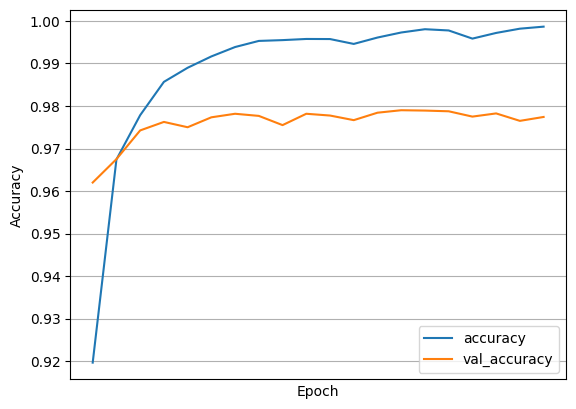

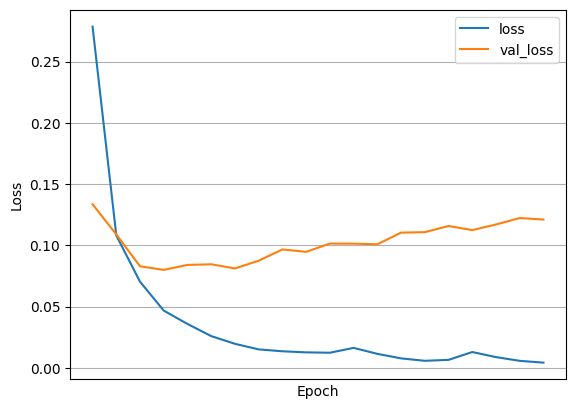

Best validation accuracy: 0.9789999723434448 at epoch 14


In [40]:
tf.keras.backend.clear_session()

model3 = keras.Sequential()
model3.add(keras.layers.Input(shape=(28, 28)))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Rescaling(1./255))

# Add more units to the layers and he normal initialization
model3.add(keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal'))
model3.add(keras.layers.Dense(256, activation='relu', kernel_initializer='he_normal'))
model3.add(keras.layers.Dense(10, activation='softmax'))

model3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model3.fit(train_ds, validation_data=val_ds, epochs=20)

# Plot the training and validation accuracy on one graph and training and validation loss on another graph
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([])
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([])
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Print the best validation accuracy
print('Best validation accuracy:', max(hist.history['val_accuracy']), 'at epoch', np.argmax(hist.history['val_accuracy']) + 1)

Accuracy is still getting better so lets make the model more powerful until it overfits.

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8711 - loss: 0.4263 - val_accuracy: 0.9634 - val_loss: 0.1165
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9712 - loss: 0.0933 - val_accuracy: 0.9738 - val_loss: 0.0857
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9834 - loss: 0.0524 - val_accuracy: 0.9753 - val_loss: 0.0803
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9887 - loss: 0.0354 - val_accuracy: 0.9735 - val_loss: 0.0966
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9910 - loss: 0.0248 - val_accuracy: 0.9772 - val_loss: 0.0856
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9941 - loss: 0.0187 - val_accuracy: 0.9768 - val_loss: 0.0896
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9940 - loss: 0.0180 - val_accuracy: 0.9747 - val_loss: 0.1070
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9941 - loss: 0.0190 - val_accuracy: 0.

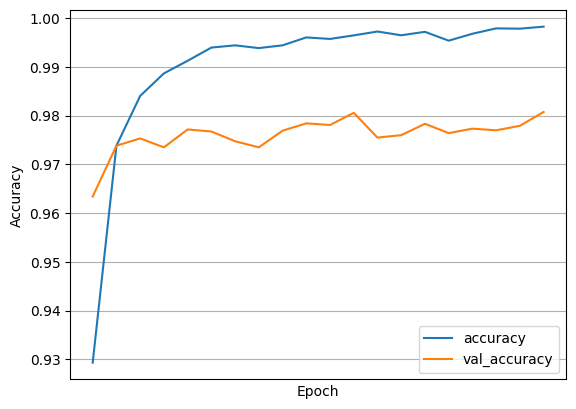

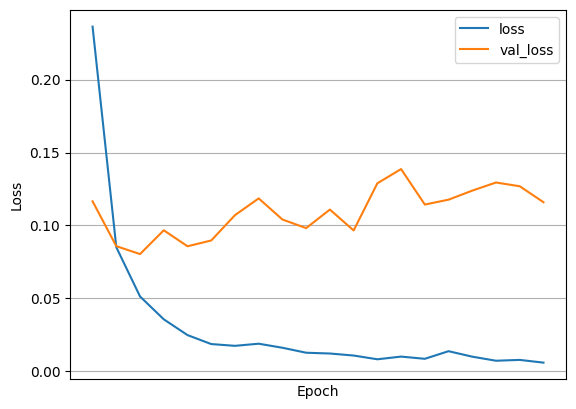

Best validation accuracy: 0.9807500243186951 at epoch 20


In [42]:
tf.keras.backend.clear_session()

model4 = keras.Sequential()
model4.add(keras.layers.Input(shape=(28, 28)))
model4.add(keras.layers.Flatten())
model4.add(keras.layers.Rescaling(1./255))

# Add more units to the layers
model4.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
model4.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
model4.add(keras.layers.Dense(10, activation='softmax'))

model4.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model4.fit(train_ds, validation_data=val_ds, epochs=20)

# Plot the training and validation accuracy on one graph and training and validation loss on another graph
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([])
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([])
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Print the best validation accuracy
print('Best validation accuracy:', max(hist.history['val_accuracy']), 'at epoch', np.argmax(hist.history['val_accuracy']) + 1)

Still getting better, more power.

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8754 - loss: 0.4066 - val_accuracy: 0.9693 - val_loss: 0.1036
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9746 - loss: 0.0865 - val_accuracy: 0.9673 - val_loss: 0.1085
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9828 - loss: 0.0549 - val_accuracy: 0.9742 - val_loss: 0.0887
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9877 - loss: 0.0377 - val_accuracy: 0.9751 - val_loss: 0.0875
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9906 - loss: 0.0292 - val_accuracy: 0.9763 - val_loss: 0.0839
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9923 - loss: 0.0241 - val_accuracy: 0.9753 - val_loss: 0.0951
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9918 - loss: 0.0260 - val_accuracy: 0.9737 - val_loss: 0.1153
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9920 - loss: 0.0230 - val_accuracy: 0.

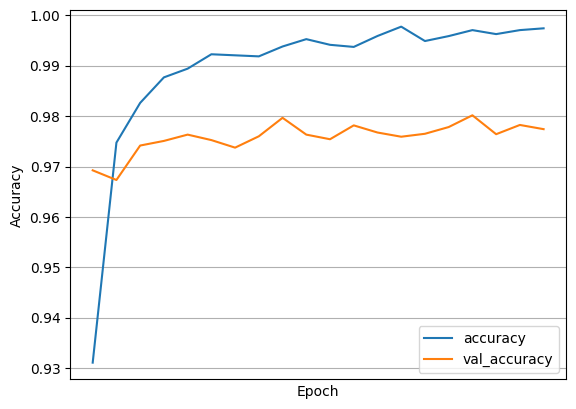

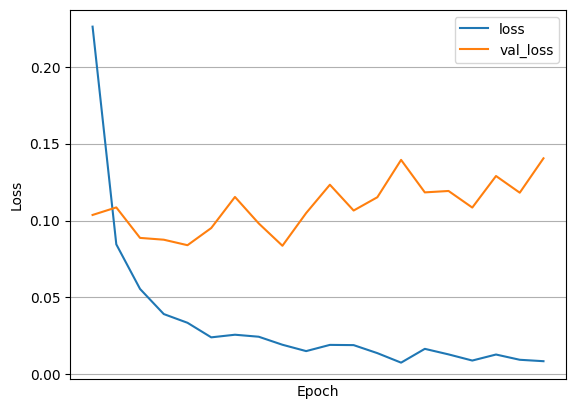

Best validation accuracy: 0.9801666736602783 at epoch 17


In [43]:
tf.keras.backend.clear_session()

model5 = keras.Sequential()
model5.add(keras.layers.Input(shape=(28, 28)))
model5.add(keras.layers.Flatten())
model5.add(keras.layers.Rescaling(1./255))

# Add another layer to the model
model5.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
model5.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
model5.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
model5.add(keras.layers.Dense(10, activation='softmax'))

model5.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model5.fit(train_ds, validation_data=val_ds, epochs=20)

# Plot the training and validation accuracy on one graph and training and validation loss on another graph
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([])
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([])
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Print the best validation accuracy
print('Best validation accuracy:', max(hist.history['val_accuracy']), 'at epoch', np.argmax(hist.history['val_accuracy']) + 1)

Accuracy dropped slightly. I'll add some regularization.

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8462 - loss: 10.7515 - val_accuracy: 0.9212 - val_loss: 0.7056
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9189 - loss: 0.6660 - val_accuracy: 0.9381 - val_loss: 0.5577
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9271 - loss: 0.5702 - val_accuracy: 0.9422 - val_loss: 0.5047
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9379 - loss: 0.5114 - val_accuracy: 0.9339 - val_loss: 0.5014
Epoch 5/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9440 - loss: 0.4712 - val_accuracy: 0.9445 - val_loss: 0.4429
Epoch 6/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9463 - loss: 0.4436 - val_accuracy: 0.9542 - val_loss: 0.4044
Epoch 7/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9494 - loss: 0.4227 - val_accuracy: 0.9550 - val_loss: 0.3990
Epoch 8/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9527 - loss: 0.4006 - val_accuracy: 0

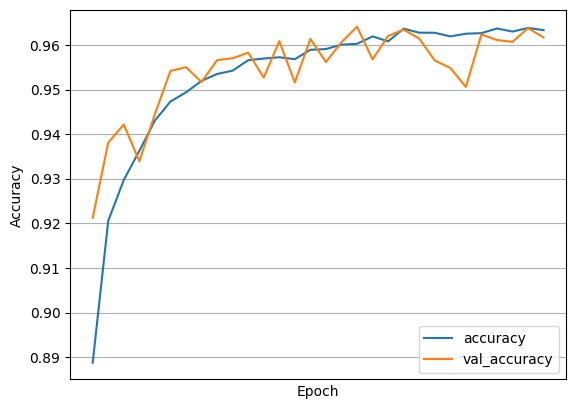

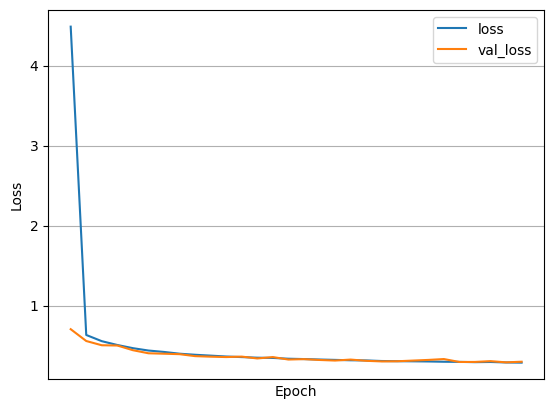

Best validation accuracy: 0.9640833139419556 at epoch 18


In [44]:
tf.keras.backend.clear_session()

model6 = keras.Sequential()
model6.add(keras.layers.Input(shape=(28, 28)))
model6.add(keras.layers.Flatten())
model6.add(keras.layers.Rescaling(1./255))

# Add L2 regularization to the model
model6.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.l2(0.01)))
model6.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.l2(0.01)))
model6.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal', kernel_regularizer=keras.regularizers.l2(0.01)))
model6.add(keras.layers.Dense(10, activation='softmax'))

model6.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train longer
hist = model6.fit(train_ds, validation_data=val_ds, epochs=30)

# Plot the training and validation accuracy on one graph and training and validation loss on another graph
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([])
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([])
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Print the best validation accuracy
print('Best validation accuracy:', max(hist.history['val_accuracy']), 'at epoch', np.argmax(hist.history['val_accuracy']) + 1)

Well, that didn't work. How about dropout?

Epoch 1/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6985 - loss: 0.9165 - val_accuracy: 0.9539 - val_loss: 0.1508
Epoch 2/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9276 - loss: 0.2471 - val_accuracy: 0.9668 - val_loss: 0.1088
Epoch 3/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9470 - loss: 0.1829 - val_accuracy: 0.9687 - val_loss: 0.1058
Epoch 4/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9557 - loss: 0.1494 - val_accuracy: 0.9703 - val_loss: 0.1024
Epoch 5/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9616 - loss: 0.1354 - val_accuracy: 0.9739 - val_loss: 0.0854
Epoch 6/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9659 - loss: 0.1124 - val_accuracy: 0.9772 - val_loss: 0.0820
Epoch 7/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9663 - loss: 0.1137 - val_accuracy: 0.9780 - val_loss: 0.0797
Epoch 8/50
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9696 - loss: 0.1013 - val_accuracy: 0.

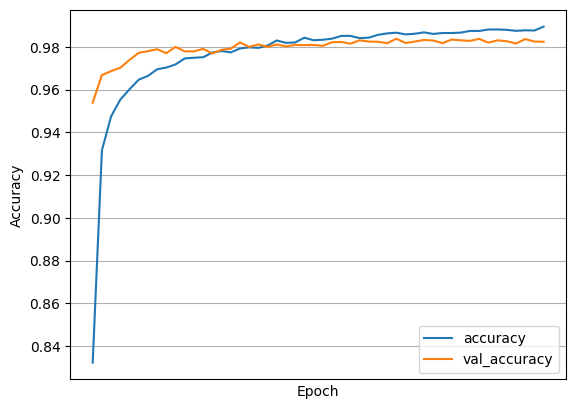

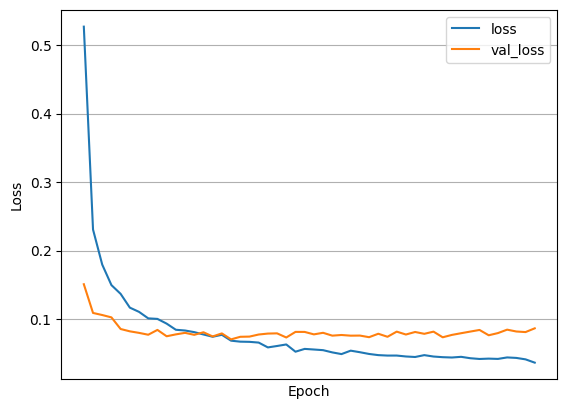

Best validation accuracy: 0.9838333129882812 at epoch 34


In [46]:
tf.keras.backend.clear_session()

model7 = keras.Sequential()
model7.add(keras.layers.Input(shape=(28, 28)))
model7.add(keras.layers.Flatten())
model7.add(keras.layers.Rescaling(1./255))

# Use dropout instead of L2 regularization
model7.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
model7.add(keras.layers.Dropout(0.5))
model7.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
model7.add(keras.layers.Dropout(0.5))
model7.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
model7.add(keras.layers.Dropout(0.5))
model7.add(keras.layers.Dense(10, activation='softmax'))

model7.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train longer
hist = model7.fit(train_ds, validation_data=val_ds, epochs=50)

# Plot the training and validation accuracy on one graph and training and validation loss on another graph
plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks([])
plt.legend(loc='lower right')
plt.grid()
plt.show()

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks([])
plt.legend(loc='upper right')
plt.grid()
plt.show()

# Print the best validation accuracy
print('Best validation accuracy:', max(hist.history['val_accuracy']), 'at epoch', np.argmax(hist.history['val_accuracy']) + 1)

That's the best model yet. Now I'll train a final model with early stopping and evaluate on the test set.

## Train the final model and evaluate on the test set

In [49]:
tf.keras.backend.clear_session()

final_model = keras.Sequential()
final_model.add(keras.layers.Input(shape=(28, 28)))
final_model.add(keras.layers.Flatten())
final_model.add(keras.layers.Rescaling(1./255))

final_model.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
final_model.add(keras.layers.Dropout(0.5))
final_model.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
final_model.add(keras.layers.Dropout(0.5))
final_model.add(keras.layers.Dense(512, activation='relu', kernel_initializer='he_normal'))
final_model.add(keras.layers.Dropout(0.5))
final_model.add(keras.layers.Dense(10, activation='softmax'))

final_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = final_model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[keras.callbacks.EarlyStopping('val_accuracy', patience=10, restore_best_weights=True)])

# Evaluate the model on the test set
loss, accuracy = final_model.evaluate(test_ds)
print('Test accuracy:', accuracy)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6995 - loss: 0.9127 - val_accuracy: 0.9538 - val_loss: 0.1568
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9275 - loss: 0.2463 - val_accuracy: 0.9654 - val_loss: 0.1195
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9486 - loss: 0.1814 - val_accuracy: 0.9696 - val_loss: 0.1027
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9551 - loss: 0.1525 - val_accuracy: 0.9740 - val_loss: 0.0886
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9615 - loss: 0.1304 - val_accuracy: 0.9753 - val_loss: 0.0855
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9648 - loss: 0.1210 - val_accuracy: 0.9768 - val_loss: 0.0810
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9670 - loss: 0.1129 - val_accuracy: 0.9758 - val_loss: 0.0801
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9690 - loss: 0.1035 - val_accu

### Comment on which techniques/methods you used to build the best model with the highest accuracy.  

I grew the model until it that started reducing performance, which indicated overfitting. Once the model was overfitting I implemented some regularization techniques to reduce the overfitting and get the best fitting model possible. My next step would have been to add a learning rate scheduler.

# Continue training the final model with a lower learning rate.

In [50]:
final_model.compile(optimizer=keras.optimizers.Adam(0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
final_model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[keras.callbacks.EarlyStopping('val_accuracy', patience=10, restore_best_weights=True)])
final_model.evaluate(test_ds)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9911 - loss: 0.0326 - val_accuracy: 0.9852 - val_loss: 0.0842
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9937 - loss: 0.0259 - val_accuracy: 0.9857 - val_loss: 0.0849
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9946 - loss: 0.0190 - val_accuracy: 0.9852 - val_loss: 0.0855
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9949 - loss: 0.0197 - val_accuracy: 0.9867 - val_loss: 0.0857
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9951 - loss: 0.0188 - val_accuracy: 0.9855 - val_loss: 0.0876
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9951 - loss: 0.0155 - val_accuracy: 0.9862 - val_loss: 0.0882
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9947 - loss: 0.0172 - val_accuracy: 0.9858 - val_loss: 0.0888
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9943 - loss: 0.0175 - val_accu

[0.07580135017633438, 0.9850999712944031]

In [51]:
final_model.compile(optimizer=keras.optimizers.Adam(0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
final_model.fit(train_ds, validation_data=val_ds, epochs=100, callbacks=[keras.callbacks.EarlyStopping('val_accuracy', patience=10, restore_best_weights=True)])
final_model.evaluate(test_ds)

Epoch 1/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9948 - loss: 0.0183 - val_accuracy: 0.9868 - val_loss: 0.0866
Epoch 2/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9950 - loss: 0.0177 - val_accuracy: 0.9868 - val_loss: 0.0868
Epoch 3/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9950 - loss: 0.0171 - val_accuracy: 0.9867 - val_loss: 0.0871
Epoch 4/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9953 - loss: 0.0171 - val_accuracy: 0.9868 - val_loss: 0.0872
Epoch 5/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9951 - loss: 0.0173 - val_accuracy: 0.9867 - val_loss: 0.0874
Epoch 6/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9951 - loss: 0.0158 - val_accuracy: 0.9863 - val_loss: 0.0876
Epoch 7/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9951 - loss: 0.0170 - val_accuracy: 0.9862 - val_loss: 0.0877
Epoch 8/100
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9955 - loss: 0.0154 - val_accu

[0.0765053927898407, 0.9851999878883362]